In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
#loading the dataset
df=pd.read_csv('/kaggle/input/highly-rated-children-books-and-stories/children_stories.Csv',encoding='latin-1')
df

,names,cats,desc
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...
...,...,...,...
425,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...
426,War and Peas,Age 8+,Nearly forty years after its original appearan...
427,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i..."
428,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...


In [6]:
#Creating Labels
list(df['cats'].unique())

['Age 2-9',
 'Age 1-2',
 'Age 1-3',
 'Age 0-2',
 'Age  0-3',
 'Age 0-3',
 'Age 3-5',
 'Age 0+',
 'Age 1-5',
 'Age 1-4',
 'Age 2-6',
 'Age 2-7',
 'Age 3-6',
 'Age 0-4',
 'Age 2-5',
 'Age 4-6',
 'Age 0-5',
 'Age 2+',
 'Age 4+',
 'Age 3+',
 'Age 3-7',
 'Age 3-4',
 'Age 1-6',
 'Age 0-6',
 'Age 4-7',
 'Age 5-8',
 'Age 1+',
 'Age 5+',
 'Age 4-11',
 'Age 2-4',
 'Age 4-5',
 'Age 4-8',
 'Age 6months+',
 'Age 6-8',
 'Age 6-11',
 'Age 8-12',
 'Age 7-10',
 'Age 7-12',
 'Age 7+',
 'Age 5-9',
 'Age 6+',
 'Age 7-9',
 'Age 8+',
 'Age 7-11',
 'Age 6-9',
 'Age 9-14',
 'Age 9-11',
 'Age 9+',
 'Age 10+',
 'Age 11+',
 'Age 13+',
 'Age 12+',
 'Age ',
 'Age 9-13',
 'Age 11-14',
 'Age 10-14',
 'Age 9-12',
 'Age 8-11',
 'Age 11-15']

In [7]:
df=df.drop(df.query('cats=="Age "').index,axis=0).reset_index(drop=True)

In [8]:
df

,names,cats,desc
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...
...,...,...,...
423,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...
424,War and Peas,Age 8+,Nearly forty years after its original appearan...
425,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i..."
426,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...


In [9]:
young_age=['Age 2-9',
 'Age 1-2',
 'Age 1-3',
 'Age 0-2',
 'Age  0-3',
 'Age 0-3',
 'Age 3-5',
 'Age 0+',
 'Age 1-5',
 'Age 1-4',
 'Age 2-6',
 'Age 2-7',
 'Age 3-6',
 'Age 0-4',
 'Age 2-5',
 'Age 4-6',
 'Age 0-5',
 'Age 2+',
 'Age 4+',
 'Age 3+',
 'Age 3-7',
 'Age 3-4',
 'Age 1-6',
 'Age 0-6',
 'Age 4-7',
 'Age 5-8',
 'Age 1+',
 'Age 5+',
 'Age 4-11',
 'Age 2-4',
 'Age 4-5',
 'Age 4-8',
 'Age 6months+']
 

In [10]:
labels=df['cats'].apply(lambda x:1 if x in young_age else 0).astype(int)

In [11]:
df['cats'].unique()

array(['Age 2-9', 'Age 1-2', 'Age 1-3', 'Age 0-2', 'Age  0-3', 'Age 0-3',
       'Age 3-5', 'Age 0+', 'Age 1-5', 'Age 1-4', 'Age 2-6', 'Age 2-7',
       'Age 3-6', 'Age 0-4', 'Age 2-5', 'Age 4-6', 'Age 0-5', 'Age 2+',
       'Age 4+', 'Age 3+', 'Age 3-7', 'Age 3-4', 'Age 1-6', 'Age 0-6',
       'Age 4-7', 'Age 5-8', 'Age 1+', 'Age 5+', 'Age 4-11', 'Age 2-4',
       'Age 4-5', 'Age 4-8', 'Age 6months+', 'Age 6-8', 'Age 6-11',
       'Age 8-12', 'Age 7-10', 'Age 7-12', 'Age 7+', 'Age 5-9', 'Age 6+',
       'Age 7-9', 'Age 8+', 'Age 7-11', 'Age 6-9', 'Age 9-14', 'Age 9-11',
       'Age 9+', 'Age 10+', 'Age 11+', 'Age 13+', 'Age 12+', 'Age 9-13',
       'Age 11-14', 'Age 10-14', 'Age 9-12', 'Age 8-11', 'Age 11-15'],
      dtype=object)

In [12]:
df['cats'].value_counts()/len(df['cats'])

cats
Age 9+          0.074766
Age 3+          0.074766
Age 7+          0.063084
Age 8+          0.060748
Age 10+         0.060748
Age 6+          0.049065
Age 2-9         0.046729
Age 4+          0.046729
Age 11+         0.044393
Age 5+          0.039720
Age 0-4         0.037383
Age 0+          0.030374
Age 2+          0.028037
Age 12+         0.028037
Age 0-3         0.025701
Age 2-6         0.023364
Age 3-6         0.021028
Age 2-5         0.021028
Age 0-5         0.018692
Age 3-5         0.016355
Age 1-3         0.014019
Age 1-5         0.011682
Age 3-7         0.011682
Age 1-4         0.009346
Age 8-12        0.009346
Age 7-11        0.009346
Age 13+         0.007009
Age 6-11        0.007009
Age 4-8         0.007009
Age 9-11        0.007009
Age 5-8         0.007009
Age 4-6         0.007009
Age 1+          0.004673
Age 4-7         0.004673
Age 6-8         0.004673
Age 9-13        0.004673
Age 7-10        0.004673
Age 5-9         0.004673
Age 9-12        0.004673
Age 7-9         0.00

In [13]:
df

,names,cats,desc
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...
...,...,...,...
423,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...
424,War and Peas,Age 8+,Nearly forty years after its original appearan...
425,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i..."
426,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...


In [14]:
#Processing the dataset with word encoding
def preproces_input(text):
    text=re.sub(r'\d+',' ',text)
    #split on whitespace
    text=text.split()
    text=' '.join([word for word in text if word not in stopwords.words('english')])
    return text

In [15]:
names=df['names'].apply(preproces_input)
description=df['desc'].apply(preproces_input)

In [16]:
names

0                              HIDE AND SEEK
1                         GINGER THE GIRAFFE
2                            DOING MY CHORES
3                        ABE THE SERVICE DOG
4              SUNNY MEADOWS WOODLAND SCHOOL
                       ...                  
423    Carrying Elephant: A Memoir Love Loss
424                                 War Peas
425                                 Love Dog
426                     A Pilgrim's Progress
427                           Secret Friends
Name: names, Length: 428, dtype: object

In [17]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(pd.concat([names,description]))
names=tokenizer.texts_to_sequences(names)
description=tokenizer.texts_to_sequences(description)

In [18]:
vocab_len=len(tokenizer.word_index)+1

In [19]:
print(vocab_len)

7269


In [20]:
max_name_length=np.max(list(map(lambda name:len(name),names)))
max_description_length=np.max(list(map(lambda description:len(description),description)))

In [21]:
print(max_description_length)

171


In [22]:
names=pad_sequences(names,maxlen=max_name_length,padding='post')
description=pad_sequences(description,maxlen=max_description_length,padding='post')

In [23]:
description

array([[1323,   95,  398, ...,    0,    0,    0],
       [  47,  183,   20, ...,    0,    0,    0],
       [  30, 3643,   32, ...,    0,    0,    0],
       ...,
       [ 324,   32, 1999, ...,    0,    0,    0],
       [2540,  794,  252, ...,    0,    0,    0],
       [ 395,   10,   45, ...,    0,    0,    0]], dtype=int32)

In [24]:
print('Shape names',names.shape)
print('Shape Description',description.shape)

Shape names (428, 9)
Shape Description (428, 171)


In [25]:
names_train,names_test,descriptions_train,descriptions_test,labels_train,labels_test=train_test_split(names,description,labels,train_size=0.7,random_state=123)

In [26]:
print(names_train.shape)
print(names_test.shape)
print(descriptions_train.shape)
print(descriptions_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(299, 9)
(129, 9)
(299, 171)
(129, 171)
(299,)
(129,)


# Constructing the Model

In [27]:
name_dim=64
name_input=tf.keras.Input(shape=(max_name_length,),name='name_input')
name_embedding=tf.keras.layers.Embedding(input_dim=vocab_len,output_dim=name_dim,input_length=max_name_length,
                                        name='name_embedding')(name_input)
name_flatten=tf.keras.layers.Flatten(name='name_flatten')(name_embedding)
    

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
desc_dim=64
desc_input=tf.keras.Input(shape=(max_description_length,),name='desc_input')
desc_embedding=tf.keras.layers.Embedding(input_dim=vocab_len,output_dim=desc_dim,input_length=max_description_length,
                                        name='desc_embedding')(desc_input)
desc_flatten=tf.keras.layers.Flatten(name='desc_flatten')(desc_embedding)
gru_layer=tf.keras.layers.GRU(units=256,return_sequences=True,name='gru_layer')(desc_embedding)
desc_flatten=tf.keras.layers.Flatten(name='desc_flatten')(gru_layer)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
concat=tf.keras.layers.concatenate([name_flatten,desc_flatten],name='concatenation')
output=tf.keras.layers.Dense(1,activation='sigmoid')(concat)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ desc_input          │ (None, 171)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_input          │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ desc_embedding      │ (None, 171, 64)   │    465,216 │ desc_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_embedding      │ (None, 9, 64)     │    465,216 │ name_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_layer (GRU)     │ (None, 171, 256)  │    247,296 │ desc_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ name_flatten        │ (None, 576)       │          0 │ name_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ desc_flatten        │ (None, 43776)     │          0 │ gru_layer[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenation       │ (None, 44352)     │          0 │ name_flatten[0][… │
│ (Concatenate)       │                   │            │ desc_flatten[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │     44,353 │ concatenation[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,222,081 (4.66 MB)

 Trainable params: 1,222,081 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

None


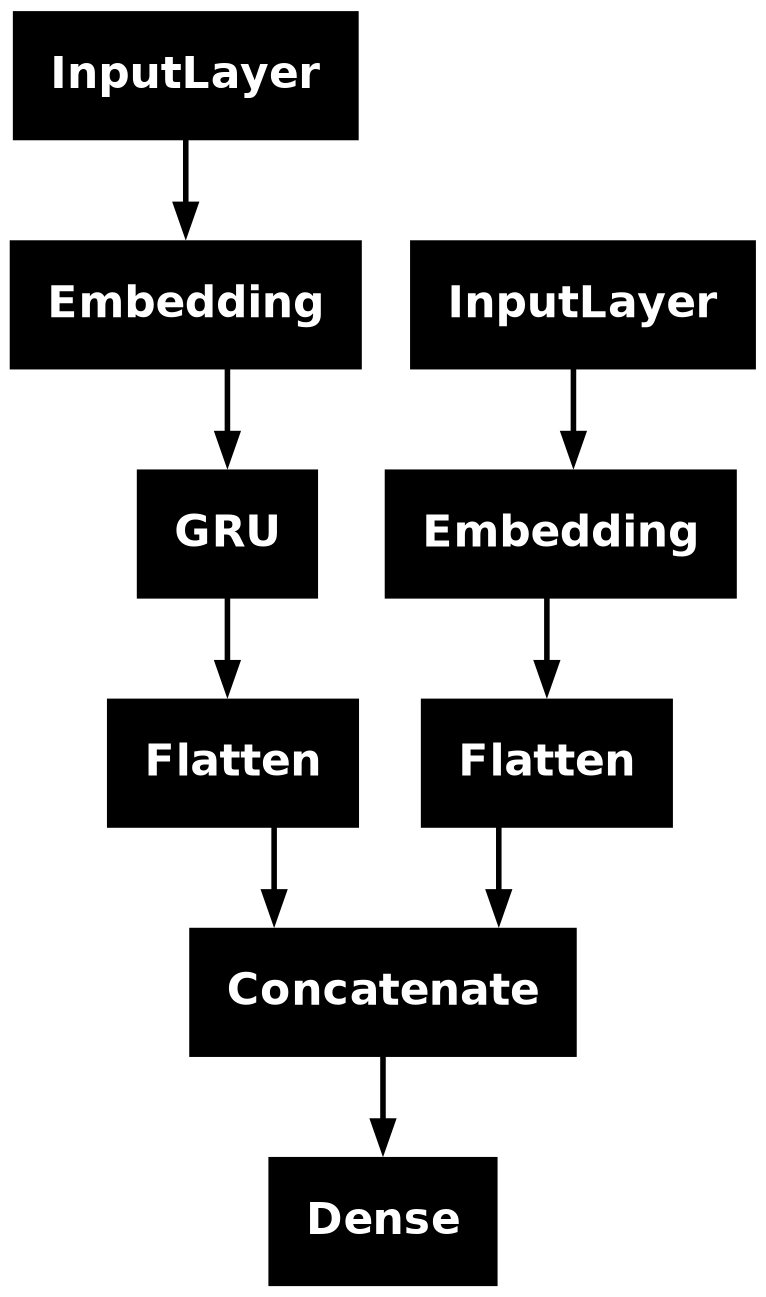

In [35]:
model=tf.keras.Model(inputs=[name_input,desc_input],outputs=output)
print(model.summary())
tf.keras.utils.plot_model(model)

In [37]:
#Training the Model
batch_size=32
epochs=14
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
history=model.fit([names_train,descriptions_train],labels_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,
                 callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.6369 - auc: 0.6329 - loss: 0.6797 - val_accuracy: 0.6333 - val_auc: 0.7013 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 2/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.7140 - auc: 0.7906 - loss: 0.5856 - val_accuracy: 0.7000 - val_auc: 0.7269 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 3/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.7382 - auc: 0.8920 - loss: 0.5204 - val_accuracy: 0.6833 - val_auc: 0.7920 - val_loss: 0.5786 - learning_rate: 0.0010
Epoch 4/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.9305 - auc: 0.9757 - loss: 0.2658 - val_accuracy: 0.7167 - val_auc: 0.7353 - val_loss: 8.1807 - learning_rate: 0.0010
Epoch 5/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 393ms/step - accuracy: 0.9762 - auc: 0.9867 - loss: 0.7351 - val_accuracy: 0.7667 - val_auc: 0.8776 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 6/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.9629 - auc: 0.9875 - loss:

In [39]:
fig=px.line(history.history,y=['loss','val_loss'],labels={'x':'epochs','y':'Loss'},title='Loss Over time')
fig.show()



In [42]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],labels={'x':'epochs','y':'Accuracy'},title='Accuracy Over time')
fig.show()

In [44]:
model.evaluate([names_test,descriptions_test],labels_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7701 - auc: 0.8456 - loss: 0.6226


[0.6222916841506958, 0.7751938104629517, 0.8505381345748901]